In [1]:
#@title Data retrieval and loading
import numpy as np
import os
data_fname = 'steinmetz_decisions.npy'
if data_fname not in os.listdir():
  !wget -qO $data_fname https://osf.io/c5bqn/download
dat = np.load('steinmetz_decisions.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['spks_20ms', 'vis_times', 'resp_times', 'contrastRight', 'contrastLeft', 'response_choice', 'feedbackType', 'brain_region', 'info'])


In [10]:
import rastermap
             
model = rastermap.Rastermap(n_components=1, n_X=30, nPC=200, init='pca')

In [27]:
print(dat['contrastRight'])
print(dat['spks_20ms'].shape)

[0.   0.   0.   0.5  0.5  0.5  0.5  1.   0.25 1.   0.5  1.   0.   0.
 0.   0.   0.   0.5  0.   0.   1.   0.   0.25 1.   0.25 0.   0.25 0.25
 0.   0.   0.5  0.   0.   0.   0.   0.25 1.   0.   0.5  0.5  0.5  0.
 0.   0.5  0.25 0.5  0.   1.   0.   1.   1.   0.   1.   1.   1.   0.
 0.   1.   1.   0.25 0.   0.   0.5  0.25 0.   1.   1.   0.   0.   0.
 0.25 0.   0.   0.5  0.   0.25 0.25 0.25 1.   0.   0.25 0.   0.   0.
 0.   0.5  0.   0.   0.25 0.25 1.   0.   0.   0.   0.   0.   0.   1.
 0.   0.   0.5  1.   1.   0.   0.25 0.   0.   0.   0.   0.   0.25 1.
 0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.5  0.   0.
 0.   0.   0.   0.   1.   1.   0.   1.   0.   0.   0.   0.   0.   0.
 0.   0.   0.5  1.   0.   0.   0.   0.   0.5  1.   0.   0.25 0.25 0.
 0.   0.25 0.   1.   0.25 1.   0.   0.5  0.   1.   1.   0.25 0.   0.5
 1.   0.25 0.   0.5  1.   0.5  1.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.25 1.   0.   0.   0.5  0.25 0.   0.   0.
 1.   0.25 0.5  0.25 1.   0.   

In [19]:
dat_flat=dat['spks_20ms'][:,0,:]

In [20]:
model.fit(dat_flat)

nmin 160
0.0016183853149414062
0.07640552520751953
0.11370706558227539
0.11594176292419434
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.01s     0        0.2009      2
0.07s    10        0.2679      4
0.14s    20        0.2898      8
0.18s    30        0.3204      18
0.22s    40        0.3539      28
0.26s    50        0.3547      28
0.30s   final      0.3547
0.30s upsampled    0.3547


[]

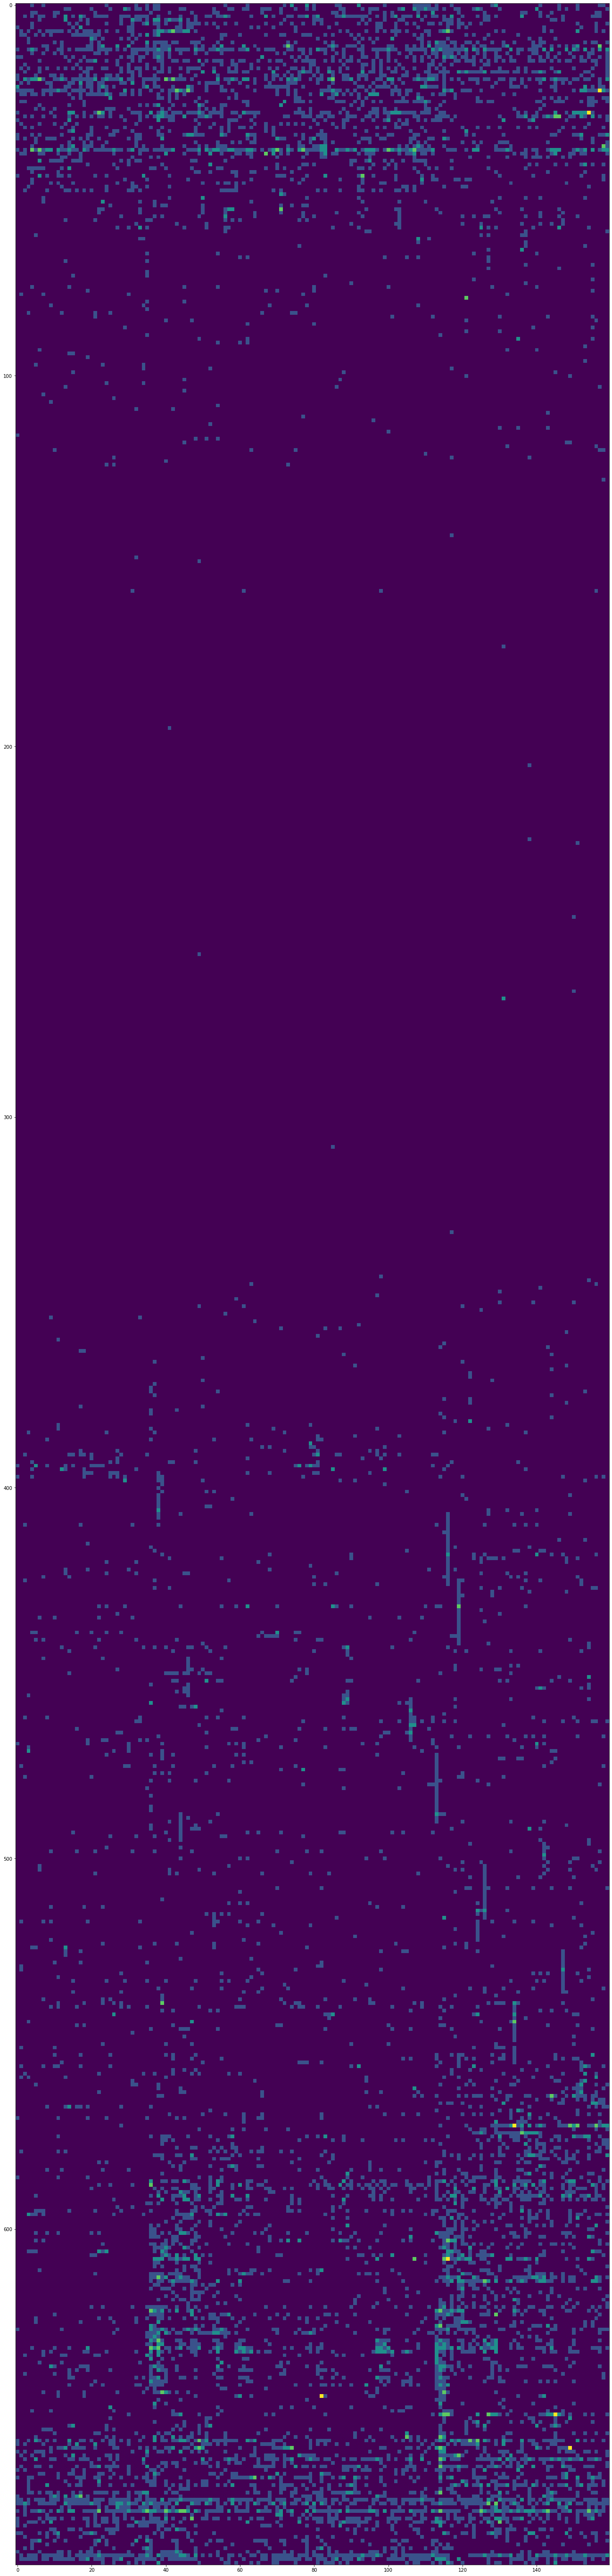

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
plt.imshow(dat_flat[model.isort, :])
[]

In [32]:
print(dat['spks_20ms'].shape)
dat_arr=[]
for j in range(340):
    dat_arr.append(dat['spks_20ms'][:,j,:])
    
dat_arr=np.array(dat_arr)

(691, 340, 160)


In [37]:
def show_rastermap(dat_arr,ind):
    model = rastermap.Rastermap(n_components=1, n_X=30, nPC=200, init='pca')
    model.fit(dat_arr[:,ind])
    plt.figure(figsize=(10,10))
    plt.imshow(dat_flat[model.isort, :])

nmin 160
0.0007259845733642578
0.0499567985534668
0.06775426864624023
0.0696556568145752
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0222      2
0.05s    10        0.0885      4
0.09s    20        0.1200      8
0.12s    30        0.1680      18
0.17s    40        0.2056      28
0.21s    50        0.2065      28
0.24s   final      0.2065
0.24s upsampled    0.2065


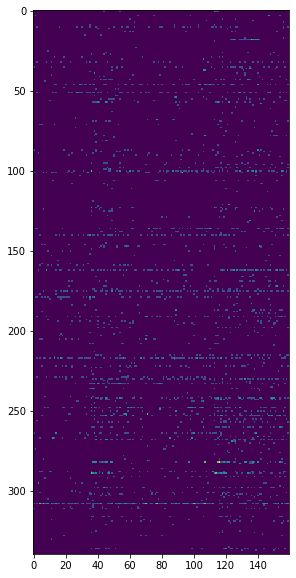

In [44]:
show_rastermap(dat_arr,2)

In [48]:
np.unique(dat['brain_region'],return_counts=True)

(array(['ACA', 'CA1', 'DG', 'LGd', 'LH', 'MD', 'MOs', 'PL', 'SUB', 'VISam',
        'VISp', 'root'], dtype='<U5'),
 array([ 16,  50,  64,  11,  18, 126,   6,  56, 105,  76,  63, 100]))

In [40]:
print(dat.keys())

dict_keys(['spks_20ms', 'vis_times', 'resp_times', 'contrastRight', 'contrastLeft', 'response_choice', 'feedbackType', 'brain_region', 'info'])


In [43]:
print(dat['response_choice'])

[ 0.  1.  0.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  0. -1.  0.  1.  1.
  1.  1.  1. -1.  1. -1. -1.  0.  1.  1. -1.  0.  1. -1.  0.  0. -1. -1.
 -1.  1.  1.  1. -1.  0.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1.  0.  0. -1.  1.  0. -1. -1.  1.  0.  1.  1.  1.
  0.  1.  0.  1. -1.  1. -1.  1.  1.  1. -1.  0.  1. -1. -1.  0.  1.  1.
 -1.  1. -1.  1. -1. -1.  0. -1.  1.  0. -1. -1. -1.  1.  1. -1.  0.  1.
  1.  1.  1. -1.  0.  1. -1.  1.  0.  0. -1. -1. -1. -1.  0.  1.  0.  0.
  1. -1. -1.  0. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  0.  1. -1. -1.
  1.  1. -1.  0. -1. -1.  0.  1.  1.  0.  0.  1.  0.  1.  1. -1.  1. -1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  0. -1.  1.  0. -1.
 -1. -1. -1. -1. -1. -1.  0.  1. -1.  0.  1. -1. -1.  1.  1.  0. -1. -1.
 -1. -1. -1. -1. -1. -1.  0. -1. -1. -1.  0.  1. -1. -1. -1.  0.  1. -1.
  1. -1.  0. -1. -1.  0. -1. -1. -1. -1.  0.  1.  1.  1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1.  1.  1. -1.  0.  1. -1.  1. -1